# Algoritmos Gulosos e Matroides
---

## Luis Martí
<br/>

#### Prova Didática 
#### Concurso Público para Provimento do Cargo de Professor Adjunto 
#### DCC/IC/UFF - edital 205/2014

## Problema do caixeiro-viajante ([*TSP*](http://en.wikipedia.org/wiki/Traveling_salesman_problem))

> *Dado um conjunto de cidades, e as distâncias entre cada par de cidades, encontrar um **tour** das cidades com a distância mínima total.* 

Um **tour (passeio)** significa que a partir de uma cidade, visitar todas as outras cidades exatamente uma vez, e, em seguida, retornar à cidade de partida.

## Como resolver o TSP?

**Alternativa 1 (Simples)**: Gerar todos os tours e escolher o que tem a menor distancia total do recorrido.

### Conceitos

- **Cidade**: a cidade é "atômica" é suficente saber a *distância* até as outras cidades.
- **Cidades**: Vamos precisar para representar um conjunto de cidades.
- **Distância**: Vamos precisar a distância entre duas cidades. Se `A` e `B` são cidades, isso poderia ser feito com uma função, a `distance(A, B)`. A distância resultante será um número real.
- **Tour**: Um passeio é uma lista ordenada de cidades.
- **Distância total**:  soma das distâncias de cidades adjacentes em um tour: `total_distance(tour)`.

## Vamos a resolver o problema em Python.

Precisamos alguns módulos, que vamos a importar

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools
%matplotlib inline

In [4]:
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours): 
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)

_Nota 1_: Ainda não definimos `total_distance` ou `alltours`.
    
_Nota 2_: `min(`*collection*`,key=`*function*`)` acha o elemento *x* de *collection* tal que *function(x)* è minimizada.

## Representação dos tours

- Um *tour* começa em uma cidade, e, em seguida, visita a cada uma das outras cidades em ordem, antes de finalmente retirning para o início. 
- Uma representação natural de um *tour* é uma sequência que é uma permutação das cidades.

In [5]:
alltours = itertools.permutations # The permutation function is already defined in the itertools module
cities = {1, 2, 3}
list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

Em realidade podemos programar um melhor `alltours` que não contem tours redundantes.

In [6]:
def alltours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

In [7]:
alltours(cities)

[[1, 2, 3], [1, 3, 2]]

## Representação das cidades e distância

Definimos `total_distance(tour)` como a soma das distâncias entre cidades consecutivas na turnê; essa parte é mostrado abaixo e é fácil.  

In [8]:
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

_Nota 3_: **Truque Python!**: quando `i` for 0, então a `distance(tour [0], tour [-1])` nos dá a distância "wrap-around" entre a primeira e última cidades, porque `tour[-1]` é o último elemento de `tour`.

Antes de definir a `distance(A, B)` precisamos definir corretamente uma cidade.

* No TSP geral não existem limites em como são definidas as cidades e as distâncias entre elas.
* Em este exercicio vamos-nos concentrar em ciudades localizadas em um *plano* e *distâncias euclideanas*.
* Existem varias representações possivéis: Alguma ideia?

Eu preferi usar o tipo de dado `complex` de Python: já tem uma distância pronta e tudo!

In [9]:
City = complex # exemplo: City(300, 400)

def distance(A, B): 
    "The distance between two points."
    return abs(A - B)

In [10]:
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

Criando problemas de forma randómica

In [11]:
def Cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), random.randrange(10, 590)) for c in range(n))

cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)

Tudo pronto para testar `exact_TSP`!

In [12]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(666+505j), (414+383j), (288+371j), (109+333j), (156+217j), (646+282j), (818+183j), (796+373j)]
1783.9834634527194


In [13]:
def plot_tour(algorithm, cities):
    "Apply a TSP algorithm to cities, and plot the resulting tour."
    # Find the solution and time how long it takes
    t0 = time.clock()
    tour = algorithm(cities)
    t1 = time.clock()
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]])
    plotline([tour[0]], 'rs')
    plt.show()
    print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
          len(tour), total_distance(tour), t1-t0, algorithm.__name__))
    
def plotline(points, style='bo-'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    plt.plot(X, Y, style)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

Um tour de `cities8`.

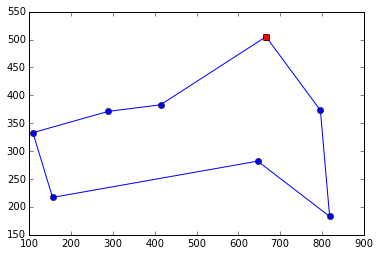

8 city tour; total distance = 1784.0; time = 0.021 secs for exact_TSP


In [14]:
plot_tour(exact_TSP, cities8)

Um tour de `cities10`.

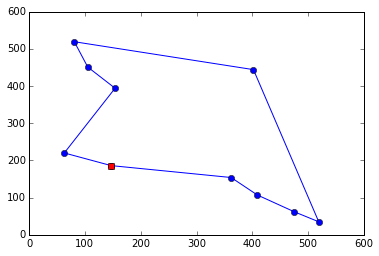

10 city tour; total distance = 1604.6; time = 1.796 secs for exact_TSP


In [15]:
plot_tour(exact_TSP, cities10)

Duas cidades mais aumenta o tempo de execução aumentou muito!

Vamos a calcular aproximadamente o aumento do tiempo de execução de `exact_TSP()`.

<table>
<tr><th>$n$ cities<th>time
<tr><td>10<td>3 secs
<tr><td>12<td>3 secs &times; 12 &times; 11 = 6.6 mins
<tr><td>14<td>6.6 mins &times; 13 &times; 14 = 20 horas
<tr><td>24<td>3 secs &times; 24! / 10! = <a href="https://www.google.com/search?q=3+seconds+*+24!+%2F+10!+in+years">16 bilhões de anos</a>
</table>

## Complexidade do TSP

* O problema do caixeiro-viajante é **intratável**.
* Os algoritmos que o resolvem de manera exacta precisam uma quantidade de tempo exponencial com relação a dimensão do problema.
* Nas próximas aulas vamos a descrever estes problemas em profundidade.

###  Vamos a presentar em uma outra alternativa ainda se ela não é exata.
### Vamos a têr que aceitar um resultado não ótimo.

## Fazer decisões "gulosas" (greedy)

> Para uma cidade selecionamos a próxima cidade no tour como a mais próxima em termos de distância.

In [16]:
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

Comparando `exact_TSP()` e `greedy_TSP()`.

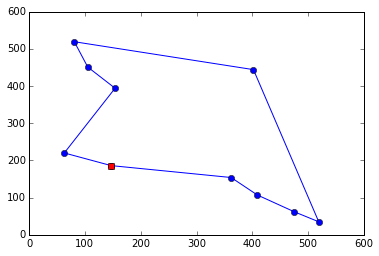

10 city tour; total distance = 1604.6; time = 1.832 secs for exact_TSP


In [17]:
plot_tour(exact_TSP, cities10)

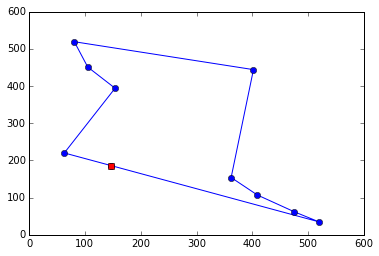

10 city tour; total distance = 1656.1; time = 0.000 secs for greedy_TSP


In [18]:
plot_tour(greedy_TSP, cities10)

* O resultado de `greedy_TSP()` é um pouco pior em termos de distância total.
* Em troca precisa muito poco tempo.
* `exact_TSP()` avalia $n!$ recorridos distintos em tanto `greedy_TSP()` considera um único tour.

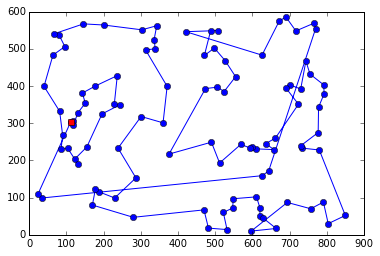

100 city tour; total distance = 6581.3; time = 0.002 secs for greedy_TSP


In [38]:
plot_tour(greedy_TSP, cities100)

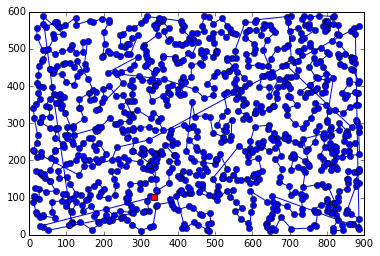

998 city tour; total distance = 21452.3; time = 0.155 secs for greedy_TSP


In [39]:
plot_tour(greedy_TSP, cities1000)

When do greedy algorithms work? It turns out that we
can give an answer to this question for a wide class of
optimization problems.

## Matróides

Um matróide é um par ordenado $M=(S,\ell)$ que satisfaz:

1. $S$ é um conjunto finito não vazio ($S\neq\varnothing$).

2. $\ell$ é uma familia não vazia de *subconjuntos independentes* de $S$:
    * $\ell$ é *hereditario* se $B \in \ell$ e $A\subseteq B$ então $A \in \ell$.
    * Note que $\varnothing\in \ell$.
3. $M$ satifaz a *propiedade de troca* se $A\in\ell$, $B\in\ell$ e $\left|A\right|<\left|B\right|$ então $\not\exists x\in B - A$ tal que $A\cup\left\{x\right\}\in\ell$.

## Matróide gráfico

Considere o matróide $M_G = (S_G, \ell_G)$ definidos em base a um grafo não orientado $G=(V,E)$:
* $S_G$ é definido como $E$, o conjunto de arestas de $G$.
* Sea $A\subset E$, então $A\in\ell_G$ $\iff$ A é acíclico. 
    * Um conjunto de arestas A é independente se e somente se G_A = (V,A) forma uma foresta.

----

**Teorema 1**: Se $G$ é um grafo não orientado, $M_G = (S_G, \ell_G)$ é um matróide.

**Teorema 2**: Todos os *subconjuntos independentes máximos* de um matróide têm o mesmo tamanho.

(Cormen et. al pág. 314)

## Matróide ponderado

Dizemos que $M=(S,\ell)$ é *ponderado* se existe uma função de peso $w$ que atribui um peso $w(x)>0$ a cada $x\in S$.

$w$ se extiende a subconjuntos de $S$ mediante o somatório,
$$
w(A) = \sum_{x\in A} w(x).
$$